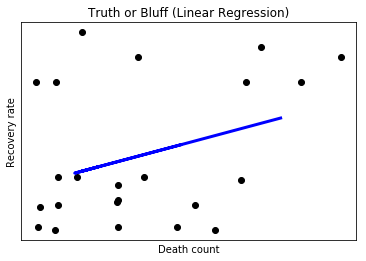

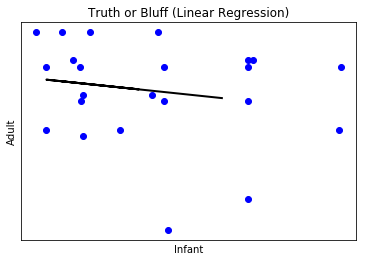

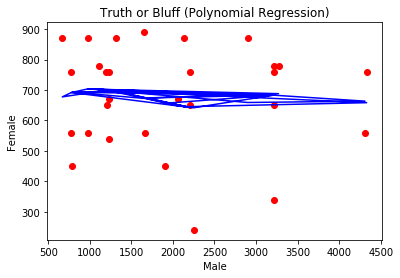

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

gender_affected = {'Male':[2060,1670,790,3210,1650,3270,1200,3210,2250,1900,3210,4310,2900,980,1230,3210,1210,1110,2210,780,670,1230,2210,1230,980,780,1320,4330,2130], 'Female':[670,560,450,780,890,780,760,650,240,450,340,560,870,560,670,760,650,780,760,560,870,540,650,760,870,760,870,760,870]}
age_group_affected = {'Infants':[230,340,540,560,120,670,780,560,450,340,540,560,210,230,450,650,760,780,430,560,230,45,56,78,56,45,34,32,44], 'Adults':[12,23,9,7,13,19,6,3,12,9,11,4,12,9,6,4,13,12,6,7,20,16,13,3,7,12,8,11,9], 'Senior Citizens': [8,19,21,18,28,14,15,6,17,13,20,25,13,14,25,27,19,20,21,2,15,19,12,20,18,26,28,19,15]}
State_wise={'State_name':['Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu and Kashmir','Jharkhand','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh' ,'Uttarakhand','West Bengal']}
Death_vs_recovery={'Death_count':[70,56,23,109,34,134,21,126,98,35,156,178,90,13,36,123,56,32,55,12,33,67,45,23,11,22,56,145,88],'Recovery_rate':[3456,1230,2211,1111,1144,9232,1122,7676,2234,4564,7656,8768,2234,2132,9873,3334,3123,5657,2343,1232,3454,8767,9878,3456,7654,7658,2425,7353,1234]}



gender_dataframe = pd.DataFrame(gender_affected)
age_group_dataframe = pd.DataFrame(age_group_affected)
state_dataframe=pd.DataFrame(State_wise)
deat_reco_dataframe=pd.DataFrame(Death_vs_recovery)  

dataframe=state_dataframe.join(gender_dataframe).join(age_group_dataframe).join(deat_reco_dataframe)
dataframe.to_csv("C:/Users/TUKAI/Desktop/malaria.csv")


#linear regression of death vs recovery

X=deat_reco_dataframe[['Death_count']]

Y=deat_reco_dataframe['Recovery_rate']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
# Split the data into training/testing sets
from sklearn.linear_model import LinearRegression
regr=LinearRegression()

regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)



# Plot outputs
plt.scatter(x_train,y_train, color = 'black')
plt.plot(x_test,y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Death count')
plt.ylabel('Recovery rate')
plt.yticks(())
plt.show()


#plotting Male vs Female malaria affected rate

X1=gender_dataframe[['Male']]
Y1=gender_dataframe['Female']

# Split the DATA into training/testing sets
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train, y1_test = train_test_split(X1,Y1,test_size=0.2)

# Split the TARGETS into training/testing sets
from sklearn.linear_model import LinearRegression
# Create linear regression object
lin_regr1 = LinearRegression()

# Train the model using the training sets
lin_regr1.fit(x1_train, y1_train)

# Make predictions using the testing set
y1_pred = lin_regr1.predict(x1_test)

# Plot linear regression
plt.scatter(x1_train, y1_train, color = 'blue')
plt.plot(x1_test, y1_pred, color = 'black', linewidth = 2)
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Infant')
plt.ylabel('Adult')
plt.xticks(())
plt.yticks(())
plt.show()

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg1 = PolynomialFeatures(degree = 4)
X1_poly = poly_reg1.fit_transform(X1)
poly_reg1.fit(X1_poly, Y1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1)

# Visualising the Polynomial Regression results
plt.scatter(X1, Y1, color = 'red')
plt.plot(X1, lin_reg_2.predict(poly_reg1.fit_transform(X1)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Male')
plt.ylabel('Female')
plt.show()

